In [78]:
import os 
import time 
import pandas as pd
from selenium import webdriver 
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs
chrome_options = Options()
chrome_options.add_argument("--headless")
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import seaborn as sns
from selenium.webdriver.common.keys import Keys

In [81]:
def get_col(list):
    

   
    url = "https://www.numbeo.com/cost-of-living/rankings.jsp"
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    city_name = []
    col_index = []
    rent_index = []
    col_rent=[]
    purchasing_power = []
    cost_of_living = {}
    
    for city in list:
        city_input = driver.find_element_by_xpath('//input[@type="search"]');
    
    
        city_input.clear()
        city_input.send_keys(city);
   
        time.sleep(1)
    

  
   
        


        #city name 
        
        try: 
            city_name.append(city)
        except IndexError:
            city_name.append('Error')
            
        #cost of living index
        try:
            col_index.append(driver.find_elements_by_xpath('//tr[@style="width: 100%"]//td[3]')[0].text)
        except IndexError:
            col_index.append(0)

        #rent index 
        try:
            rent_index.append(driver.find_elements_by_xpath('//tr[@style="width: 100%"]//td[4]')[0].text)
        except IndexError:
            rent_index.append(0)

        #cost of living plus rent index 
        try:
            col_rent.append(driver.find_elements_by_xpath('//tr[@style="width: 100%"]//td[5]')[0].text)
        except IndexError:
            col_rent.append(0)

        #purchasing power 
        try:
            purchasing_power.append(driver.find_elements_by_xpath('//tr[@style="width: 100%"]//td[8]')[0].text)
        except IndexError:
            purchasing_power.append(0)





    #create dictionary 
    cost_of_living = {"City": city_name,
             "COL": col_index, 
             "Rent":rent_index,
             "COL_Plus_Rent": col_rent,
             "Purchasing_Power": purchasing_power
             }

    col_df = pd.DataFrame(cost_of_living)

    return(col_df)


In [82]:
#collecting data using the scraping tool

project_list = ["Dallas, tx","Miami, fl","Atlanta, ga","Detroit, mi","Cleveland, oh","Denver, co",
                "Orlando, fl","st.louis, mo","Charlotte, nc","Salt Lake City, ut","Columbus, oh","Las Vegas, nv",
                "Kansas City, mo" ,"Indianapolis, in","Cincinnati, oh","Raleigh, nc","phoenix, az",
                "portland, or","houston, tx","seattle, wa","san francisco, ca","Austin, Tx","san jose, ca",
                "boston, ma","washington, dc","philadelphia, pa","fremont, CA","New York, NY","arlington, va",
                "los angeles, ca","irvine, ca","chicago, il","Minneapolis, MN","Baltimore, MD","San Diego, CA",
                "Palo Alto, CA"]
COL_index = get_col(project_list)
COL_index.tail()

,City,COL,Rent,COL_Plus_Rent,Purchasing_Power
31,"chicago, il",78.90,59.84,70.08,107.54
32,"Minneapolis, MN",81.37,46.50,65.24,99.86
33,"Baltimore, MD",72.38,44.68,59.56,115.56
34,"San Diego, CA",75.71,70.63,73.36,106.67
35,"Palo Alto, CA",0,0,0,0


In [83]:
#viewing column data types

COL_index.dtypes

City                object
COL                 object
Rent                object
COL_Plus_Rent       object
Purchasing_Power    object
dtype: object

In [84]:
#converting num columns to num types 

num_cols = ["COL", "Rent", "COL_Plus_Rent", "Purchasing_Power"]

COL_index[num_cols] = COL_index[num_cols].apply(pd.to_numeric)

COL_index.dtypes

City                 object
COL                 float64
Rent                float64
COL_Plus_Rent       float64
Purchasing_Power    float64
dtype: object

In [97]:
#making a copy of the df

cost_of_living=COL_index.copy()

In [98]:
#converting city names to upper case 

cost_of_living['City'] = cost_of_living['City'].str.upper()
cost_of_living.head()

,City,COL,Rent,COL_Plus_Rent,Purchasing_Power
0,"DALLAS, TX",67.72,50.13,59.58,131.77
1,"MIAMI, FL",78.96,64.31,72.18,74.75
2,"ATLANTA, GA",76.89,50.83,64.83,116.46
3,"DETROIT, MI",67.46,39.18,54.37,100.69
4,"CLEVELAND, OH",76.77,38.41,59.02,100.60


<AxesSubplot:xlabel='COL', ylabel='Count'>

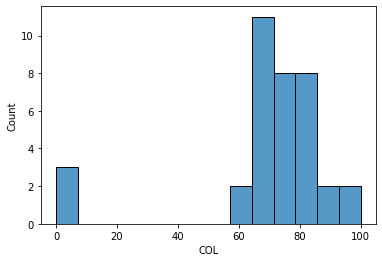

In [99]:
#histogram of cost of living 

sns.histplot(data=cost_of_living, x="COL")

In [100]:
#rows equal to 0 values

cost_of_living[cost_of_living["COL"]==0]

,City,COL,Rent,COL_Plus_Rent,Purchasing_Power
7,"ST.LOUIS, MO",0.0,0.0,0.0,0.0
28,"ARLINGTON, VA",0.0,0.0,0.0,0.0
35,"PALO ALTO, CA",0.0,0.0,0.0,0.0


In [101]:
#Because cost of living index is missing for these three cities,
#they will be substituted with the closest geographical city that most closely 
#resembles socio economic statistics of these cities 
#Palo Alto - San Jose
#St. Louis, - Indianapolis,in
#Arlington,va - Washington DC 

cost_of_living.loc[[7],:] = cost_of_living[cost_of_living["City"]=="INDIANAPOLIS, IN"].values
cost_of_living.loc[[28],:] = cost_of_living[cost_of_living["City"]=="WASHINGTON, DC"].values
cost_of_living.loc[[35],:] = cost_of_living[cost_of_living["City"]=="SAN JOSE, CA"].values

In [102]:
#checking for any more missing values 

cost_of_living[cost_of_living["COL"]==0]

,City,COL,Rent,COL_Plus_Rent,Purchasing_Power


<AxesSubplot:xlabel='COL', ylabel='Count'>

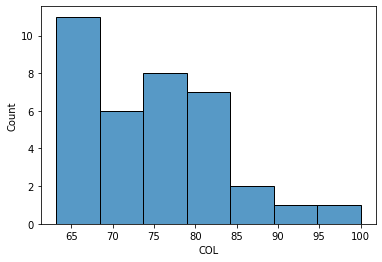

In [103]:
#histogram of COL values

sns.histplot(data=cost_of_living, x="COL")

<AxesSubplot:xlabel='COL_Plus_Rent', ylabel='Count'>

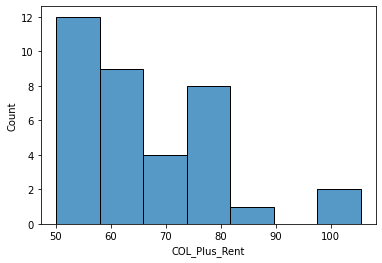

In [104]:
#histogram of COL plus rent values

sns.histplot(data=cost_of_living, x="COL_Plus_Rent")

In [105]:
#saving COL information for analysis

cost_of_living.to_csv("./COL.csv")

# 